In [168]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression 

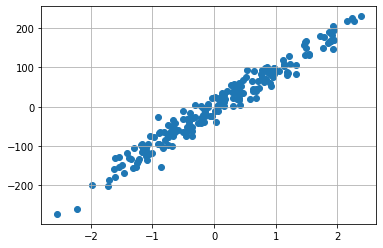

In [169]:
xvals, yvals = make_regression(n_samples = 200, n_features = 1, n_targets = 1, noise = 20, random_state = 0)
xvals, yvals = tf.constant(xvals, dtype = tf.float32), tf.constant(yvals, dtype = tf.float32)
plt.scatter(xvals, yvals)
plt.grid(True)
plt.show()

In [170]:
w = tf.Variable(5.0)
b = tf.Variable(0.0)

In [171]:
def forward(x,w,b):
    return (x * w) + b

def train_step(x, y, w, b, lr):

    with tf.GradientTape() as tape :
        yhat = forward(x,w,b)
        loss = loss_fn(yhat,y)

    dw, db = tape.gradient(loss, [w,b])

    w.assign_sub(lr * dw)
    b.assign_sub(lr * db)

    return loss.numpy()

def plot_line(x,y,w,b):
    plt.scatter(x,y)
    plt.scatter(x,forward(x,w,b), c='r')
    plt.grid(True)
    plt.show()

loss_fn = tf.keras.losses.MeanSquaredError()

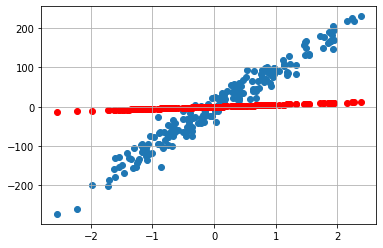

In [172]:
plot_line(xvals,yvals,w,b)

In [173]:
epochs = 4000
lr = 0.001

for epoch in range(epochs):
    loss = train_step(xvals, yvals, w, b, lr)
    if epoch % (epochs/10) == 0 :
        print(f'Epoch : {epoch} | Loss : {loss}')

Epoch : 0 | Loss : 9179.890625
Epoch : 400 | Loss : 2035.682861328125
Epoch : 800 | Loss : 699.8426513671875
Epoch : 1200 | Loss : 446.6633605957031
Epoch : 1600 | Loss : 397.9961853027344
Epoch : 2000 | Loss : 388.50531005859375
Epoch : 2400 | Loss : 386.6278076171875
Epoch : 2800 | Loss : 386.2513427734375
Epoch : 3200 | Loss : 386.1748352050781
Epoch : 3600 | Loss : 386.1591491699219


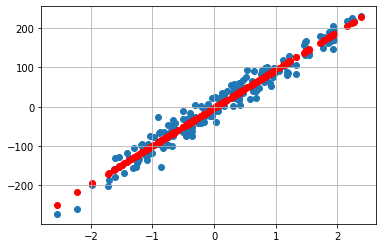

In [174]:
plot_line(xvals,yvals,w,b)